<a href="https://colab.research.google.com/github/AnishDey11/PRODIGY_ML_02/blob/main/task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
file_path = '/content/Mall_Customers.csv'
data = pd.read_csv(file_path)

In [ ]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

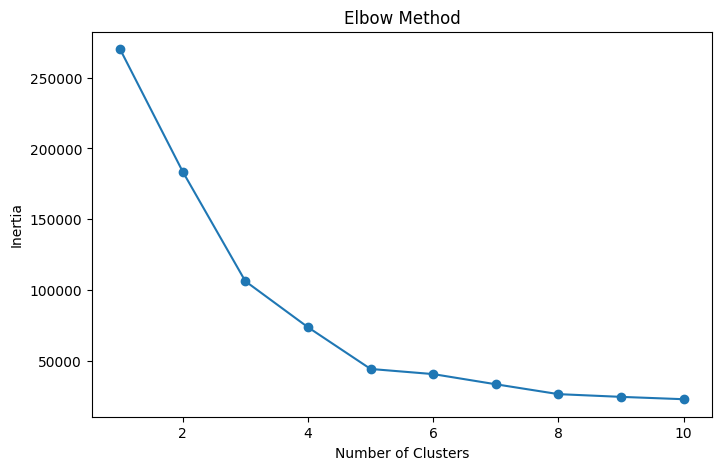

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
knee = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
optimal_clusters = knee.knee
print(f"The optimal number of clusters is: {optimal_clusters}")

The optimal number of clusters is: 5


In [ ]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

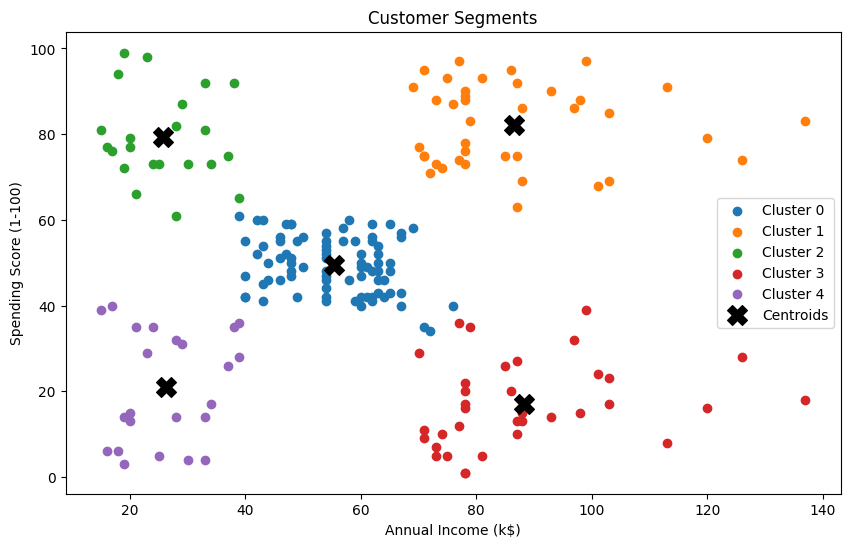

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()